# Project Title : Book Recommendation

# Business Objective:

## Generate the features from the dataset and use them to recommend the books accordingly to the users.


# Content

## The Book-Crossing dataset comprises 3 files.

### •	Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

### •	Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site.

### •	Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv("C:\\Users\\Admin\\Downloads\\vidya\\ratings.csv", low_memory=False)
users = pd.read_csv("C:\\Users\\Admin\\Downloads\\vidya\\users.csv", low_memory=False)
books = pd.read_csv("C:\\Users\\Admin\\Downloads\\vidya\\books.csv", low_memory=False)

#### Books data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print("No. of observations:{}\nNo. of parameters:{}".format(books.shape[0],books.shape[1]))

No. of observations:271360
No. of parameters:8


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [7]:
books.duplicated().sum()

0

In [8]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [9]:
#since year data has some object it it, we shall convert it into null data
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')
books['Year-Of-Publication'].isna().sum()

3

In [10]:
#since year data has the year 0 and 2022 which is invalid, we shall convert it into null data
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0), 'year'] = np.NAN
#Replacing null data with median 
books['Year-Of-Publication'].fillna(books['year'].median() , inplace = True)
books['Year-Of-Publication'].isna().sum()

3

In [11]:
#Finding and replacing null data from publisher
books.loc[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,NaN


In [12]:
#Replacing null data from publisher
books['Publisher'].fillna('other' , inplace = True)
books['Publisher'].isna().sum()

0

In [13]:
#Finding and replacing null data from author
books.loc[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,NaN


In [14]:
#replacing null data from publisher
books['Book-Author'].fillna("Unknown" , inplace = True)
books['Book-Author'].isna().sum()

0

#### User data

In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<AxesSubplot:xlabel='Age'>

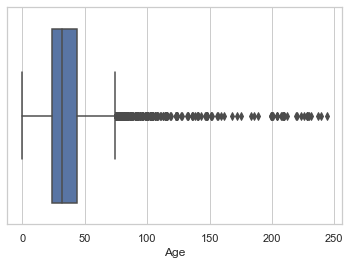

In [17]:
sns.set(style="whitegrid")
sns.boxplot(x='Age',data=users)

In [18]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [19]:
#removing age above 100 and below 5 
users.loc[(users['Age'] > 100) | (users['Age'] < 5) , 'Age' ] = np.NAN

In [20]:
users['Age'].isna().sum()

112010

In [21]:
#Filling the null values with mean
users['Age'].fillna(users['Age'].mean(), inplace = True)

In [22]:
users.duplicated().sum()

0

#### Rating data

In [23]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
ratings.shape

(1149780, 3)

In [25]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [26]:
ratings.duplicated().sum()

0

In [27]:
ratings.loc[ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


<AxesSubplot:>

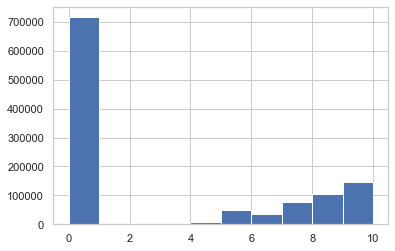

In [28]:
ratings['Book-Rating'].hist(bins=10)

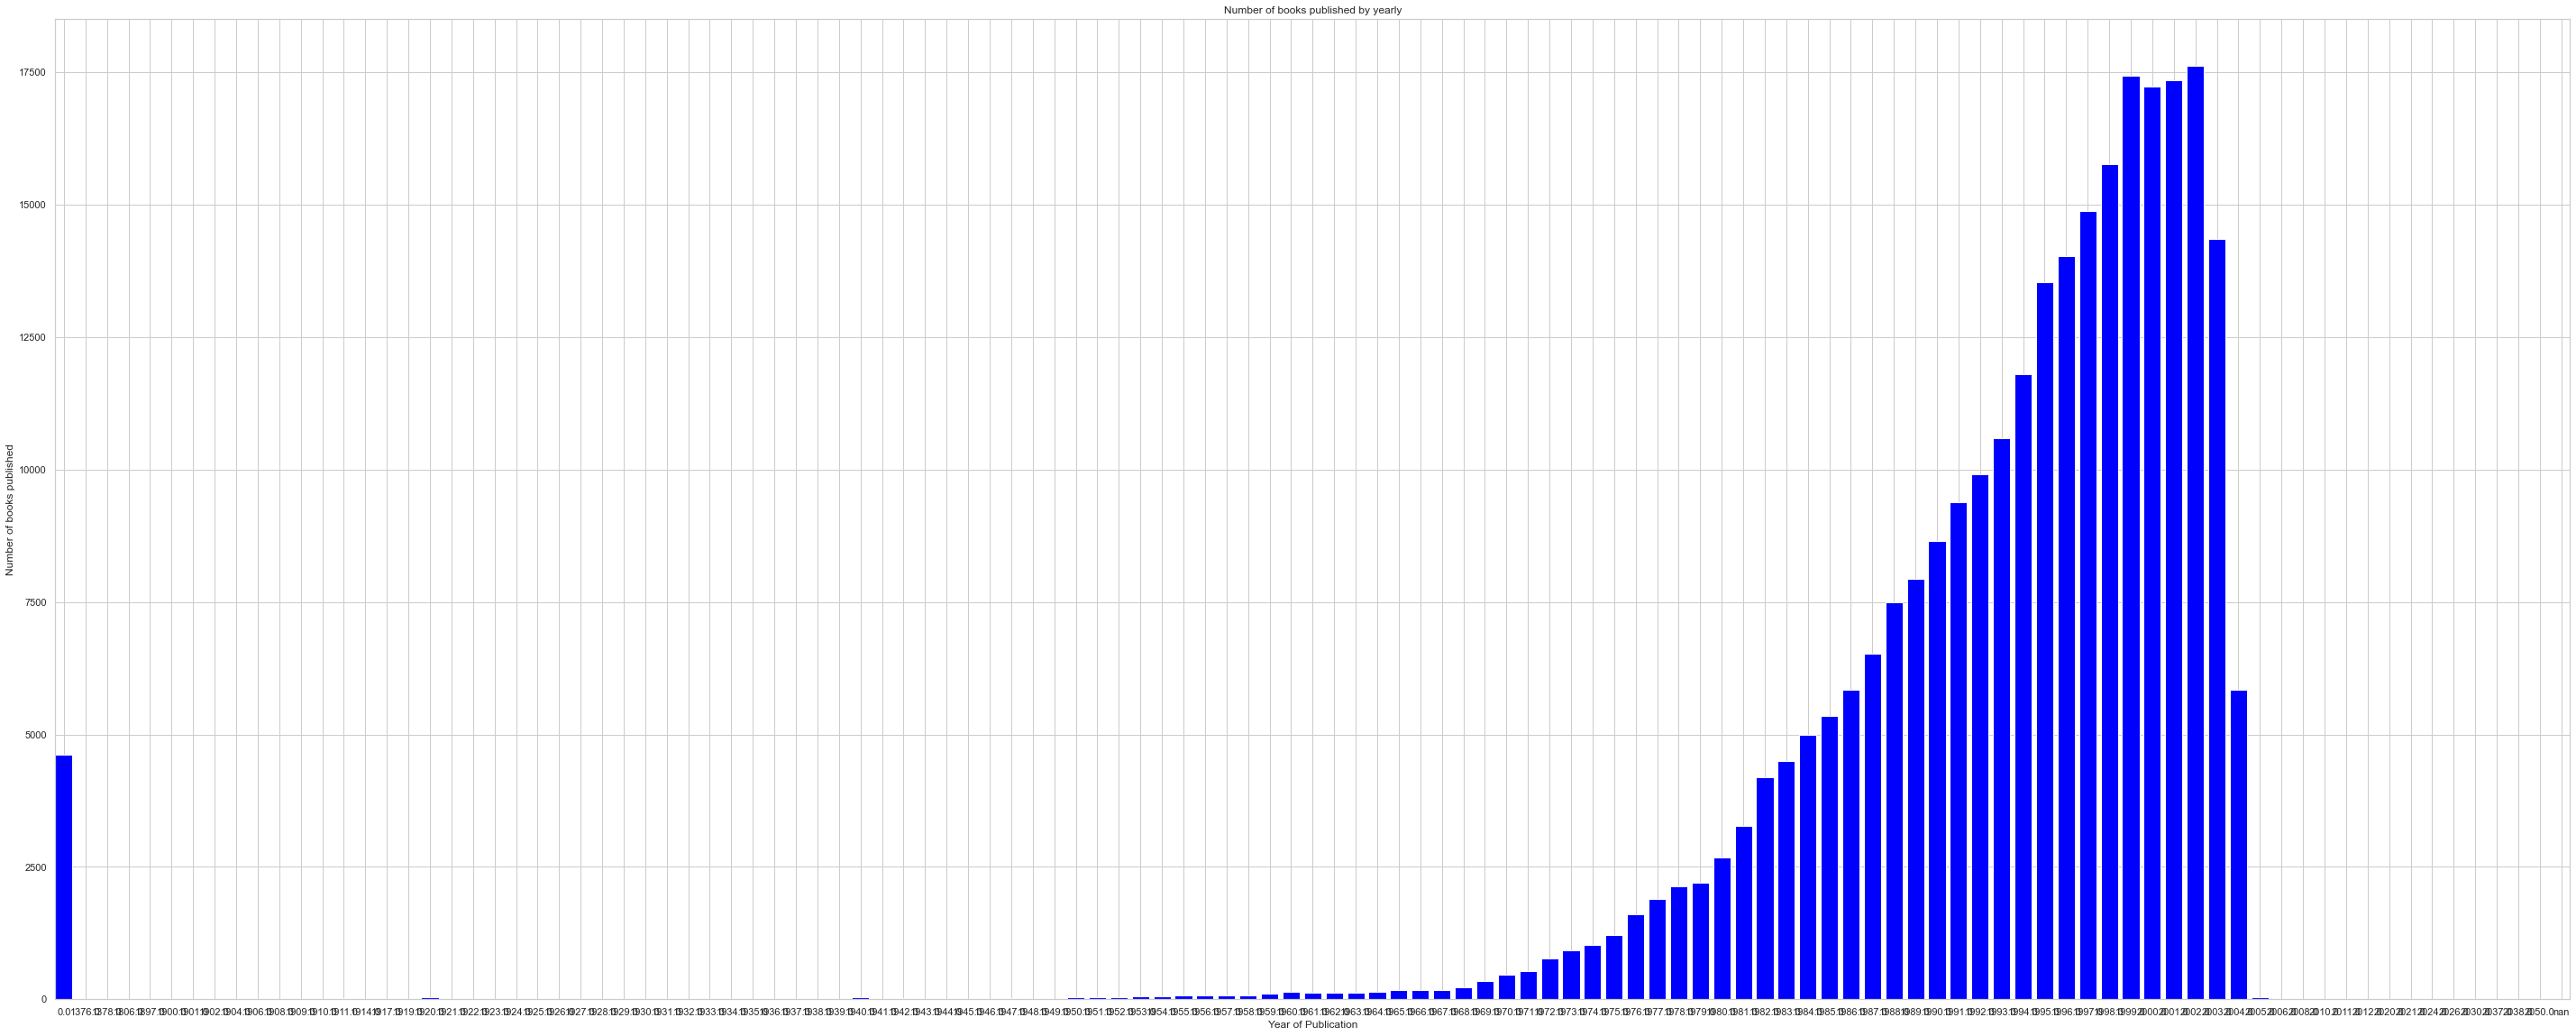

In [29]:
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(50, 20))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published by yearly")
plt.margins(x = 0)
plt.show()

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

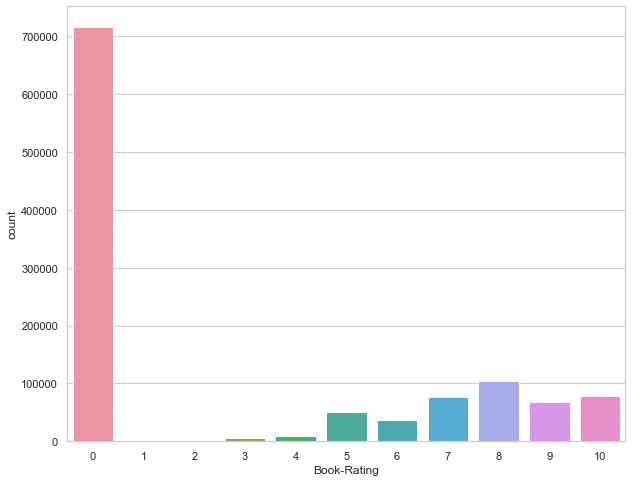

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="Book-Rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

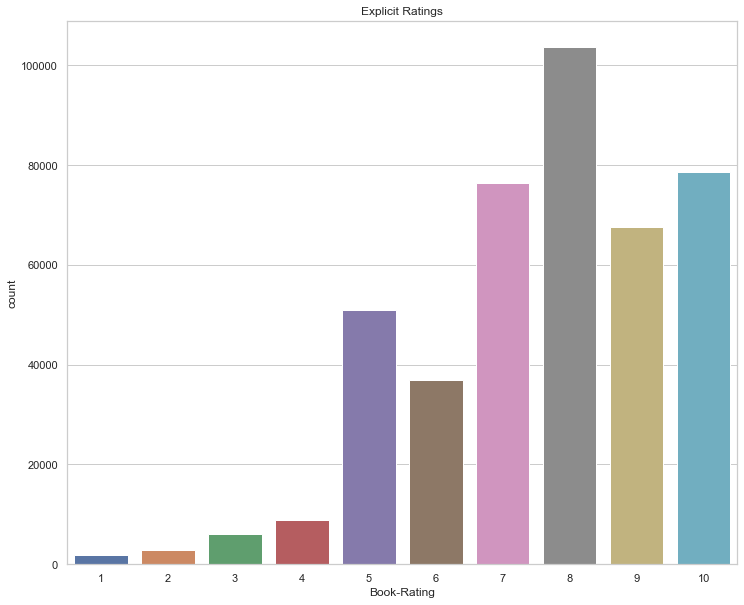

In [31]:
# Explicit Ratings
plt.figure(figsize=(12,10))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

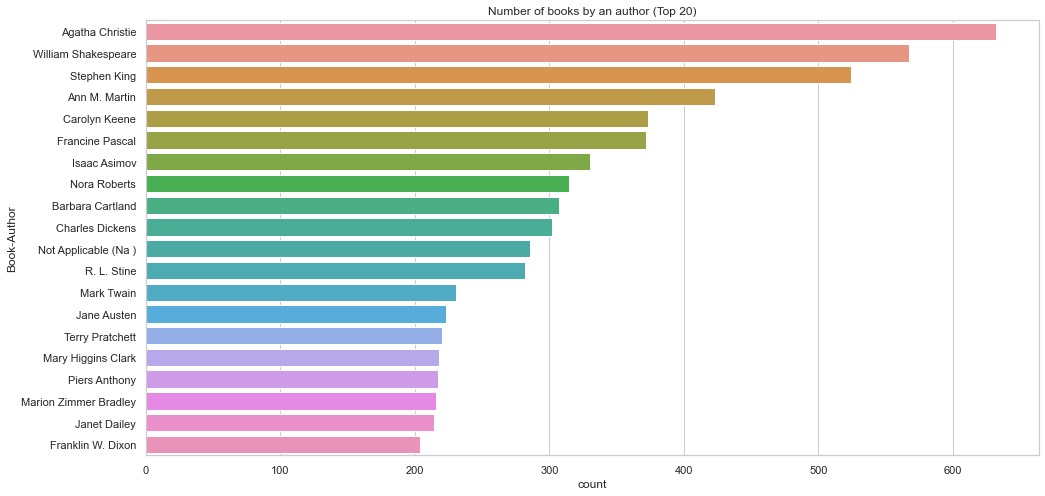

In [32]:
#number of books published by an author (top-20)
plt.figure(figsize=(16,8))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title("Number of books by an author (Top 20)")

Text(0.5, 1.0, 'Number of books published by a publisher (Top 20)')

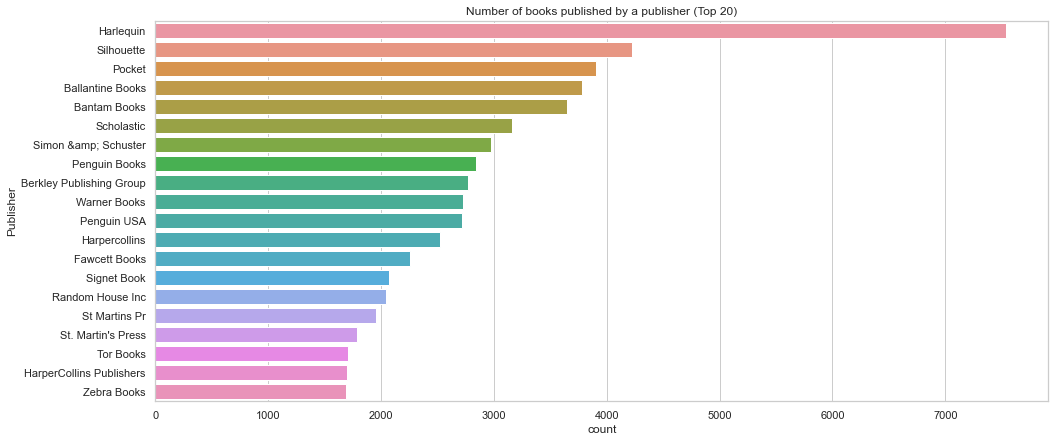

In [33]:
# number of books published by publisher (top 20)
plt.figure(figsize=(16,7))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:20])
plt.title("Number of books published by a publisher (Top 20)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 10)')

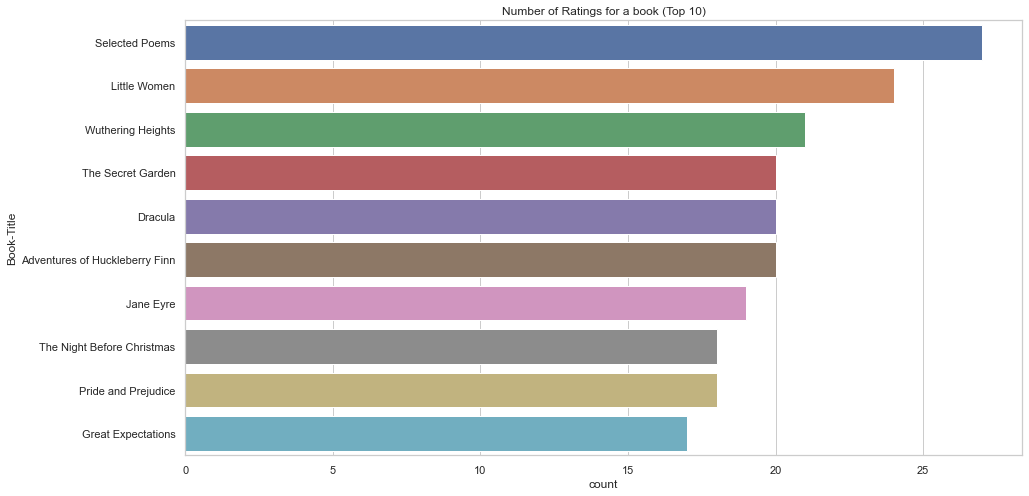

In [34]:
# Plotting of ratings 
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:10])
plt.title("Number of Ratings for a book (Top 10)")

## Simple Popularity based Recommendation System

In [35]:
ratings_count = ratings.groupby(by=['ISBN'])['Book-Rating'].sum()
ratings_count = pd.DataFrame(ratings_count)
top10 = ratings_count.sort_values('Book-Rating' , ascending=False).head(10)
print("The following books are recommended")
top10.merge(books , left_index=True , right_on= 'ISBN')

The following books are recommended


,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,NaN
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,NaN
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,NaN
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,NaN
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,NaN
26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,NaN
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,NaN
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,NaN
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,NaN


# Recommendation using KNN

In [36]:
# merging datasets
merged_data = pd.merge(books, ratings, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, users, on='User-ID', how='inner')

data1 = (merged_data.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Total-Rating'}))


In [37]:
print(sorted(data1['Total-Rating'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 216, 219, 220, 221, 222, 223, 224, 225, 22

In [38]:
data = pd.merge(data1, merged_data, on='Book-Title', left_index = False)
data = data[data['Total-Rating'] >= 50]
data = data.reset_index(drop = True)

#building a matrix
from scipy.sparse import csr_matrix
df = data.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
matrix = csr_matrix(df)

In [39]:
from sklearn.neighbors import NearestNeighbors
book_name = input("Enter a book name: ")
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(matrix)

distances, indices = model.kneighbors(df.loc[book_name].values.reshape(1, -1), n_neighbors =10)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(df.index[indices.flatten()[i]]) 

Enter a book name: The Lovely Bones: A Novel

Recommended books:

Lucky : A Memoir
Where the Heart Is (Oprah's Book Club (Paperback))
Life of Pi
The Da Vinci Code
Lucky
The Secret Life of Bees
Good in Bed
The Pact: A Love Story
Suzanne's Diary for Nicholas


In [40]:
df1 = data[data['Book-Title']=="Charlie and the Chocolate Factory"]#getting the details who read Charlie and the Chocolate Factory
df1

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
41680,Charlie and the Chocolate Factory,71,0140328696,Roald Dahl,1994.0,Puffin Books,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,NaN,197659,7,"indiana, pennsylvania, usa",49.000000
41681,Charlie and the Chocolate Factory,71,0553150979,Roald Dahl,1977.0,Bantam Books,http://images.amazon.com/images/P/0553150979.0...,http://images.amazon.com/images/P/0553150979.0...,http://images.amazon.com/images/P/0553150979.0...,NaN,113519,0,"pleasanton, california, usa",34.746638
41682,Charlie and the Chocolate Factory,71,0375815260,ROALD DAHL,2001.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375815260.0...,http://images.amazon.com/images/P/0375815260.0...,http://images.amazon.com/images/P/0375815260.0...,NaN,79186,10,"fairbanks, alaska, usa",37.000000
41683,Charlie and the Chocolate Factory,71,0140328696,Roald Dahl,1994.0,Puffin Books,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,NaN,101209,0,"ft huachuca, arizona, usa",44.000000
41684,Charlie and the Chocolate Factory,71,0140328696,Roald Dahl,1994.0,Puffin Books,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,NaN,105979,7,"oakland, california, usa",26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41746,Charlie and the Chocolate Factory,71,0553150979,Roald Dahl,1977.0,Bantam Books,http://images.amazon.com/images/P/0553150979.0...,http://images.amazon.com/images/P/0553150979.0...,http://images.amazon.com/images/P/0553150979.0...,NaN,106086,0,"austin, texas, usa",9.000000
41747,Charlie and the Chocolate Factory,71,0375815260,ROALD DAHL,2001.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375815260.0...,http://images.amazon.com/images/P/0375815260.0...,http://images.amazon.com/images/P/0375815260.0...,NaN,146027,7,"marshall, missouri, usa",34.746638
41748,Charlie and the Chocolate Factory,71,0140328696,Roald Dahl,1994.0,Puffin Books,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,NaN,71863,9,"westfield, new jersey, usa",34.746638
41749,Charlie and the Chocolate Factory,71,0553244787,Roald Dahl,0.0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553244787.0...,http://images.amazon.com/images/P/0553244787.0...,http://images.amazon.com/images/P/0553244787.0...,NaN,139572,10,"ogden, utah, usa",34.746638


In [41]:
df2 = data[data['Book-Title']=="Matilda"]#getting the details who read Matilda
df2

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
122229,Matilda,130,014034294X,Roald Dahl,1990.0,Puffin Books,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,NaN,11676,0,"n/a, n/a, n/a",34.746638
122230,Matilda,130,2070512541,Roald Dahl,2002.0,Contemporary French Fiction,http://images.amazon.com/images/P/2070512541.0...,http://images.amazon.com/images/P/2070512541.0...,http://images.amazon.com/images/P/2070512541.0...,NaN,11676,0,"n/a, n/a, n/a",34.746638
122231,Matilda,130,014034294X,Roald Dahl,1990.0,Puffin Books,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,NaN,230522,0,"colorado springs, colorado, usa",52.000000
122232,Matilda,130,014034294X,Roald Dahl,1990.0,Puffin Books,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,NaN,245827,5,"albuquerque, ,",34.746638
122233,Matilda,130,0141301066,Roald Dahl,1998.0,Puffin Books,http://images.amazon.com/images/P/0141301066.0...,http://images.amazon.com/images/P/0141301066.0...,http://images.amazon.com/images/P/0141301066.0...,NaN,245827,5,"albuquerque, ,",34.746638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122354,Matilda,130,0140327592,Roald Dahl,1990.0,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,NaN,16923,6,"salop, england, united kingdom",16.000000
122355,Matilda,130,0140327592,Roald Dahl,1990.0,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,NaN,32490,0,"canberra, australian capital territory, australia",15.000000
122356,Matilda,130,0140327592,Roald Dahl,1990.0,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,NaN,103825,0,"canberra, australian capital territory, australia",32.000000
122357,Matilda,130,0140327592,Roald Dahl,1990.0,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,http://images.amazon.com/images/P/0140327592.0...,NaN,265695,9,"norwich, england, united kingdom",23.000000


In [42]:
x=set(df1["User-ID"].values)#contain the userid of those who read Charlie and the chocolate factory
y=set(df2["User-ID"].values)#contain the userid of those who read matilda

In [43]:
similar_users = x & y
print(similar_users)

{74689, 251394, 115490, 249628, 174791, 155495, 138441, 144555, 2766, 184532, 98741, 201526, 69078, 130554, 263163, 239004, 17950}


In [44]:
data[data["User-ID"]==74689].sort_values('Book-Rating', ascending=False).head(5)

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
178669,Stormy Weather,103,0446677167,Carl Hiaasen,2001.0,Warner Books,http://images.amazon.com/images/P/0446677167.0...,http://images.amazon.com/images/P/0446677167.0...,http://images.amazon.com/images/P/0446677167.0...,NaN,74689,7,"seattle, washington, usa",39.0
41736,Charlie and the Chocolate Factory,71,0140328696,Roald Dahl,1994.0,Puffin Books,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,http://images.amazon.com/images/P/0140328696.0...,NaN,74689,0,"seattle, washington, usa",39.0
46510,Cold Mountain,194,0871136791,Charles Frazier,1997.0,Atlantic Monthly Press,http://images.amazon.com/images/P/0871136791.0...,http://images.amazon.com/images/P/0871136791.0...,http://images.amazon.com/images/P/0871136791.0...,NaN,74689,0,"seattle, washington, usa",39.0
105454,Island of the Blue Dolphins (Laurel Leaf Books),90,0440940001,Scott O'Dell,1978.0,Laure Leaf,http://images.amazon.com/images/P/0440940001.0...,http://images.amazon.com/images/P/0440940001.0...,http://images.amazon.com/images/P/0440940001.0...,NaN,74689,0,"seattle, washington, usa",39.0
122319,Matilda,130,014034294X,Roald Dahl,1990.0,Puffin Books,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,http://images.amazon.com/images/P/014034294X.0...,NaN,74689,0,"seattle, washington, usa",39.0


In [45]:
data[data["User-ID"]==251394].sort_values('Book-Rating', ascending=False).head(5)

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
209091,The Fellowship of the Ring (The Lord of the Ri...,368,0345339703,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,NaN,251394,10,"portland, maine, usa",25.0
12201,"A Wizard of Earthsea (Earthsea Trilogy, Book 1)",68,0553262505,URSULA K. LE GUIN,1984.0,Bantam,http://images.amazon.com/images/P/0553262505.0...,http://images.amazon.com/images/P/0553262505.0...,http://images.amazon.com/images/P/0553262505.0...,NaN,251394,10,"portland, maine, usa",25.0
114946,Life of Pi,664,0156027321,Yann Martel,2003.0,Harvest Books,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,http://images.amazon.com/images/P/0156027321.0...,NaN,251394,10,"portland, maine, usa",25.0
257184,The Thief Lord,124,043942089X,Cornelia Funke,2003.0,Chicken House,http://images.amazon.com/images/P/043942089X.0...,http://images.amazon.com/images/P/043942089X.0...,http://images.amazon.com/images/P/043942089X.0...,NaN,251394,9,"portland, maine, usa",25.0
103060,Interpreter of Maladies,136,039592720X,Jhumpa Lahiri,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,NaN,251394,9,"portland, maine, usa",25.0


In [46]:
data[data["User-ID"]==115490].sort_values('Book-Rating', ascending=False).head(5)

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
134347,Night,202,0553272535,Elie Wiesel,1982.0,Bantam Books,http://images.amazon.com/images/P/0553272535.0...,http://images.amazon.com/images/P/0553272535.0...,http://images.amazon.com/images/P/0553272535.0...,NaN,115490,10,"dekalb, illinois, usa",34.746638
154220,Reading Lolita in Tehran: A Memoir in Books,99,081297106X,Azar Nafisi,2003.0,Random House Trade Paperbacks,http://images.amazon.com/images/P/081297106X.0...,http://images.amazon.com/images/P/081297106X.0...,http://images.amazon.com/images/P/081297106X.0...,NaN,115490,10,"dekalb, illinois, usa",34.746638
257750,The Thorn Birds,227,0060129565,Colleen McCullough,1977.0,Harpercollins,http://images.amazon.com/images/P/0060129565.0...,http://images.amazon.com/images/P/0060129565.0...,http://images.amazon.com/images/P/0060129565.0...,NaN,115490,10,"dekalb, illinois, usa",34.746638
159671,Rush Limbaugh Is a Big Fat Idiot: And Other Ob...,89,0385314744,Al Franken,1996.0,Delacorte Press,http://images.amazon.com/images/P/0385314744.0...,http://images.amazon.com/images/P/0385314744.0...,http://images.amazon.com/images/P/0385314744.0...,NaN,115490,10,"dekalb, illinois, usa",34.746638
217098,The Handmaid's Tale,311,0449212602,Margaret Atwood,1989.0,Fawcett Books,http://images.amazon.com/images/P/0449212602.0...,http://images.amazon.com/images/P/0449212602.0...,http://images.amazon.com/images/P/0449212602.0...,NaN,115490,10,"dekalb, illinois, usa",34.746638


In [47]:
data[data["User-ID"]==249628].sort_values('Book-Rating', ascending=False).head(5)

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
88364,Harriet the Spy,80,0064403319,Louise Fitzhugh,1990.0,HarperTrophy,http://images.amazon.com/images/P/0064403319.0...,http://images.amazon.com/images/P/0064403319.0...,http://images.amazon.com/images/P/0064403319.0...,NaN,249628,10,"whitney, texas, usa",51.0
247899,The Scottish Bride (Bride Trilogy (Paperback)),67,0515129933,Catherine Coulter,2001.0,Jove Books,http://images.amazon.com/images/P/0515129933.0...,http://images.amazon.com/images/P/0515129933.0...,http://images.amazon.com/images/P/0515129933.0...,NaN,249628,10,"whitney, texas, usa",51.0
146638,Plainsong (Vintage Contemporaries),156,0375705856,KENT HARUF,2000.0,Vintage,http://images.amazon.com/images/P/0375705856.0...,http://images.amazon.com/images/P/0375705856.0...,http://images.amazon.com/images/P/0375705856.0...,NaN,249628,10,"whitney, texas, usa",51.0
14505,Adventures of Huckleberry Finn,81,0451523733,Mark Twain,1959.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523733.0...,http://images.amazon.com/images/P/0451523733.0...,http://images.amazon.com/images/P/0451523733.0...,NaN,249628,10,"whitney, texas, usa",51.0
88576,Harry Potter and the Chamber of Secrets (Book 2),556,0439064872,J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,NaN,249628,9,"whitney, texas, usa",51.0


In [48]:
data[data["User-ID"]==174791].sort_values('Book-Rating', ascending=False).head(5)

,Book-Title,Total-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,year,User-ID,Book-Rating,Location,Age
258713,"The Two Towers (The Lord of the Rings, Part 2)",260,0345339711,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,NaN,174791,10,"long beach, california, usa",38.0
248520,The Secret Garden,155,0440477093,Frances H. Burnett,1990.0,Yearling Books,http://images.amazon.com/images/P/0440477093.0...,http://images.amazon.com/images/P/0440477093.0...,http://images.amazon.com/images/P/0440477093.0...,NaN,174791,5,"long beach, california, usa",38.0
5820,A Little Princess,65,0064401871,Frances Hodgson Burnett,1987.0,HarperTrophy,http://images.amazon.com/images/P/0064401871.0...,http://images.amazon.com/images/P/0064401871.0...,http://images.amazon.com/images/P/0064401871.0...,NaN,174791,0,"long beach, california, usa",38.0
41697,Charlie and the Chocolate Factory,71,0553244787,Roald Dahl,0.0,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553244787.0...,http://images.amazon.com/images/P/0553244787.0...,http://images.amazon.com/images/P/0553244787.0...,NaN,174791,0,"long beach, california, usa",38.0
276417,"Welcome to Dead House (Goosebumps, No 1)",57,0590453653,R. L. Stine,1995.0,Scholastic,http://images.amazon.com/images/P/0590453653.0...,http://images.amazon.com/images/P/0590453653.0...,http://images.amazon.com/images/P/0590453653.0...,NaN,174791,0,"long beach, california, usa",38.0


#taking similiar user-id (who has read and given the book good rating)(74689, 251394, 115490, 249628, 174791) the following are the books

In [49]:
list = ('Stormy Weather','Charlie and the Chocolate Factory' , 'The Fellowship of the Ring (The Lord of the Rings, Part 1)' ,'A Wizard of Earthsea (Earthsea Trilogy, Book 1)','Reading Lolita in Tehran: A Memoir in Books' , 'Night' , 'Harriet the Spy' , 'The Scottish Bride (Bride Trilogy (Paperback))','The Two Towers (The Lord of the Rings, Part 2)' , 'The Secret Garden')

In [50]:
#Top 10 books
list

('Stormy Weather',
 'Charlie and the Chocolate Factory',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'A Wizard of Earthsea (Earthsea Trilogy, Book 1)',
 'Reading Lolita in Tehran: A Memoir in Books',
 'Night',
 'Harriet the Spy',
 'The Scottish Bride (Bride Trilogy (Paperback))',
 'The Two Towers (The Lord of the Rings, Part 2)',
 'The Secret Garden')

In [51]:
import pickle

In [52]:
pickle.dump(df,open("df.pkl","wb"))

In [53]:
pickle.dump(model,open("model.pkl","wb"))

In [54]:
pickle.dump(data,open("data.pkl","wb"))